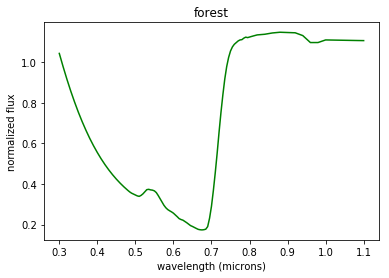

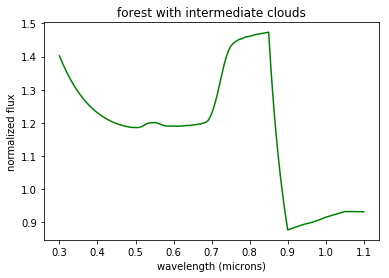

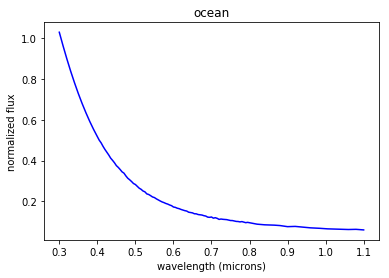

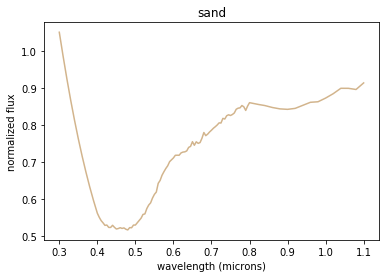

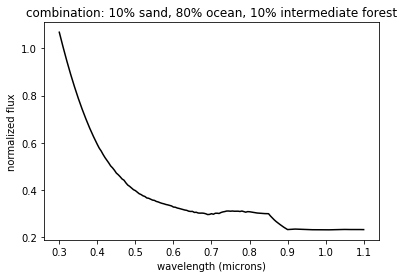

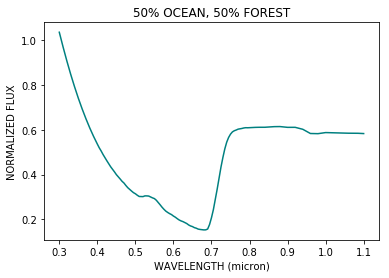

In [85]:
from scipy.stats import chisquare
from scipy.interpolate import interp1d as interpolate
import numpy as np
import matplotlib.pyplot as plt

forestA44 = np.loadtxt('spectra/forest_clear_a44.dat')
ocean_clear = np.loadtxt('spectra/ocean_clear_atmosphere.dat')
sandA44 = np.loadtxt('spectra/sand_clear_a44.dat')
forestInter = np.loadtxt('spectra/forest_intermediate_clouds.dat')


f1axis = forestA44[:,0]

forest1 = forestA44[:,1]
ocean = ocean_clear[:,1]
sand = sandA44[:,1]
forestI = forestInter[:,1]

plt.plot(f1axis, forest1, color = 'green')
plt.title("forest")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()
plt.plot(f1axis, forestI, color = 'green')
plt.title("forest with intermediate clouds")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()
plt.plot(f1axis, ocean, color = 'blue')
plt.title("ocean")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()
plt.plot(f1axis, sand, color = 'tan')
plt.title("sand")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()
model = (1/10)*sand + (8/10)*ocean + (1/10)*forestI
plt.plot(f1axis, model, color = 'black')
plt.title("combination: 10% sand, 80% ocean, 10% intermediate forest")
plt.xlabel("wavelength (microns)")
plt.ylabel("normalized flux")
plt.show()

mod = (5/10)*ocean + (5/10)*forest1
plt.plot(f1axis, mod, color = 'teal')
plt.title("50% OCEAN, 50% FOREST")
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("NORMALIZED FLUX")
plt.show()



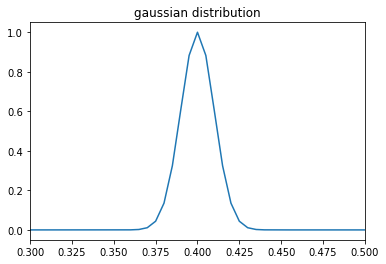


'EARTH'
CHI-SQUARED:  5.300895387929883e-05

'EARTH' (wrong combination)
CHI-SQUARED:  16.291120827112007

'MARS'
CHI-SQUARED:  0.0003802558941644519



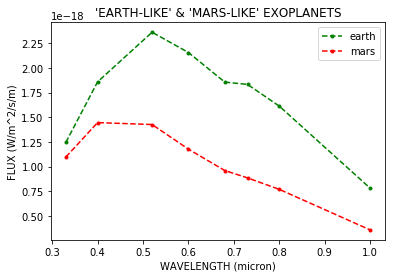

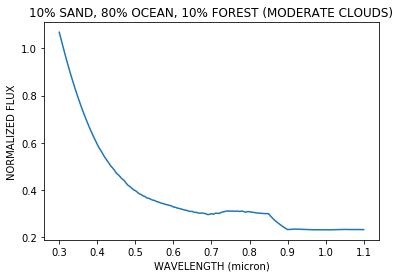

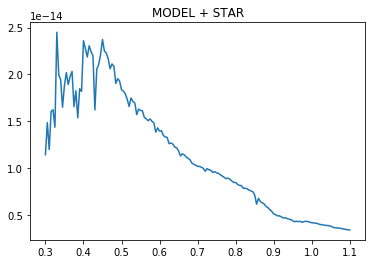

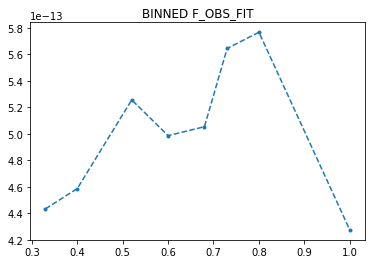

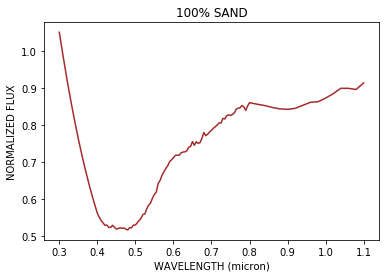

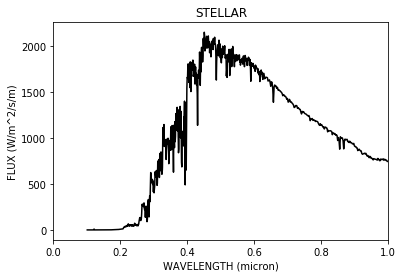

In [22]:
from scipy.stats import chisquare
from scipy.interpolate import interp1d as interpolate
import numpy as np
import matplotlib.pyplot as plt
import math

#Earth/Mars gaussian
#interpolate to larger data set
#chi-square with gaussian distribution
#ijk = 10

earthfile = np.loadtxt('spectra/exoplanet_earth_1Re_4pc.dat')
marsfile = np.loadtxt('spectra/exoplanet_mars_2Re_4pc.dat')
stellarfile = np.loadtxt('spectra/stellar_spectrum.dat')

earthaxis = earthfile[:,0]
earth = earthfile[:,1]

marsaxis = marsfile[:,0]
mars = marsfile[:,1]

stellaraxis = stellarfile[:,0]
stellar = stellarfile[:,1]

forestA44 = np.loadtxt('spectra/forest_clear_a44.dat')
ocean_clear = np.loadtxt('spectra/ocean_clear_atmosphere.dat')
sandA44 = np.loadtxt('spectra/sand_clear_a44.dat')
forestInter = np.loadtxt('spectra/forest_intermediate_clouds.dat')


f1axis = forestA44[:,0]

forest1 = forestA44[:,1]
ocean = ocean_clear[:,1]
sand = sandA44[:,1]
forestI = forestInter[:,1]

def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2) / (2*np.power(sigma, 2)))
    
#EARTH
grid = np.zeros([9,9,9])
for x in range(9):
    for y in range(9):
        for z in range(9):
            grid[x][y][z] = 1000000
            
chi_values = []
chi_where = []
errors = []
yo = 0

for i in range(1,9):
    for j in range(1,9):
        for k in range(1,9):
            if(i+j+k == 10):
                new = sand*(i/10) + ocean*(j/10) + forestI*(k/10)
                function = interpolate(stellaraxis, stellar)
                final = []
                #interpolates to smaller data set
                for a in range(len(f1axis)):
                    final.append(function(f1axis[a]))
                    
                constant = ((1/(4*math.pi)))*((2.067020883**-10)**2/16)
                for l in range(len(final)):
                    final[l] = constant*final[l]
                right_hand = final*new
                #size of right_hand = 161
                for b in range(len(earthaxis)):
                    gauss = gaussian(f1axis, earthaxis[b], 0.01)
                    model = sum(gauss*right_hand)
                    errors.append(chisquare(earth[b], model)[0])
                    if(yo == 0):
                        plt.plot(f1axis, gaussian(f1axis, earthaxis[b+1], 0.01))
                        plt.xlim(earthaxis[b+1]-0.1, earthaxis[b+1]+0.1)
                        plt.title("gaussian distribution")
                        plt.show()
                        yo+= 1
                grid[i][j][k] = sum(errors)
                errors = []
chi_values.append(np.min(grid))
chi_where.append(np.where(grid == np.min(grid)))
    
print()
print("'EARTH'")
print("CHI-SQUARED: ", chi_values[0])
#print("SAND    OCEAN   FORESTI")
#print(chi_where)
print()

function = interpolate(stellaraxis, stellar)
final = []

for a in range(len(f1axis)):
    final.append(function(f1axis[a]))
    
constant = ((1/(4*math.pi)))*((2.067020883**-10)**2/16)
for l in range(len(final)):
    final[l] = constant*final[l]
right_hand = final*forestI

for b in range(len(earthaxis)):
    gauss = gaussian(f1axis, earthaxis[b], 0.01)
    model = sum(gauss*right_hand)
    errors.append(chisquare(earth[b], model)[0])
    
print("'EARTH' (wrong combination)")
print("CHI-SQUARED: ", sum(errors)*100000)
print()
    
    
errors = []
function = interpolate(stellaraxis, stellar)
final = []

for a in range(len(f1axis)):
    final.append(function(f1axis[a]))
    
constant = ((1/(4*math.pi)))*((2*2.067020883**-10)**2/16)
for l in range(len(final)):
    final[l] = constant*final[l]
right_hand = final*sand

for b in range(len(marsaxis)):
    gauss = gaussian(f1axis, marsaxis[b], 0.01)
    model = sum(gauss*right_hand)
    errors.append(chisquare(mars[b], model)[0])
    
print("'MARS'")
print("CHI-SQUARED: ", sum(errors))
print()

y_errors1 = earthfile[:,2]
y_errors2 = marsfile[:,2]
#print(y_errors)

#plt.errorbar(earthaxis, earth, yerr = y_errors1)
plt.plot(earthaxis, earth, '.', linestyle = '--', color = 'green', label = 'earth')
#plt.errorbar(marsaxis, mars, yerr = y_errors2)
plt.plot(marsaxis, mars, '.', linestyle = '--', color = 'red', label = 'mars')
plt.legend(loc = 'upper right')
plt.title("'EARTH-LIKE' & 'MARS-LIKE' EXOPLANETS")
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("FLUX (W/m^2/s/m)") #last meter is for the wavelength bin
#plt.xlim(0.3,0.35)
#plt.ylim(1e-18, 1.5e-18)
plt.show()

new = (1/10)*sand + (8/10)*ocean + (1/10)*forestI
plt.title("10% SAND, 80% OCEAN, 10% FOREST (MODERATE CLOUDS)")
plt.plot(f1axis, new)
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("NORMALIZED FLUX") 
plt.show()

constant = ((1/(4*math.pi)))*((2.067020883**-10)**2/16)
F_obs = final*new*constant
plt.title("MODEL + STAR")
plt.plot(f1axis, F_obs)
plt.show()

#plt.title("F_OBS_FIT")
#for a in range (len(final)):
#    final[a] = final[a]*constant
#plt.plot(f1axis, F_obs/final)
#plt.show()

plt.title("BINNED F_OBS_FIT")
star = []
for b in range(len(earthaxis)):
    star.append(function(earthaxis[b])*constant)
plt.plot(earthaxis, earth/star , '.', linestyle = '--')
plt.show()

plt.title("100% SAND")
plt.plot(f1axis, sand, color = 'brown')
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("NORMALIZED FLUX") 
plt.show()

plt.title("STELLAR")
plt.plot(stellaraxis, stellar, color = 'black')
plt.xlim(0,1)
plt.xlabel("WAVELENGTH (micron)")
plt.ylabel("FLUX (W/m^2/s/m)") 
plt.show()


In [320]:
import math
import numpy as np
from scipy.integrate import quad

#T = 3042K
#m star interesting features, using black body to make it simple
#nu = freq, can just convert
#error bars - make them bigger and bigger until it gets the wrong answer

def planck(x):#, h, c, k, T):
    
    # T = temperature
    # h = planck constant
    # c = speed of light
    # k = boltzmann constant
    
    T = 3042
    h = 6.626*(10**-34)
    c = 3*(10**10)
    k = 1.38*(10**-23)
    #x = x*100
    
    #x = x
    c = 3*(10**8)
    
    
    #print("WAVELENGTH: ", x)
#    print("T: ", T, "h: ", h, "c: ", c, "k: ", k)
    #one = 2*h*x**3/(c**2)
#    one = (2*(8.617*(10**-5))*(x**3)/((3*(10**8))**2))
#    p1 = (8.617*(10**-5))*x
    #p1 = h*x
#    p2 = (4.316*(10**-15))*5778
    #p2 = k*T
#    print("p1 ", p1, "p2 ", p2, "one ", one)
    #p3 = math.exp(p1/p2)-1.
    #two = (1/p3)
#    E = (8.617*(10**-5))*(3*(10**8))/((3*(10**8))/x)
    #E = h*x
    
    # planck function based on wavelength
    
    one = (2*h*c**2)/(x**5)
    p1 = h*c
    p2 = x*k*T
    p3 = math.exp(p1/p2)-1
    two = (1/p3)
    E = h*c/x
    
    # returns number of photons in wavelength bin
    
    return one*two/E

# frequency bounds in SI
bound1 = c/(0.36*(10**-6))
bound2 = c/(0.51*(10**-6))
#print(bound1, bound2)

# wavelength bounds in SI
bound1 = (0.285*(10**-6))
bound2 = (0.435*(10**-6))

I, err = quad(planck, bound1, bound2)#, args = (h, c, k, T))
print("FULL BOUND (number of photons): ", I)

forestA44 = np.loadtxt('spectra/forest_clear_a44.dat')
ocean_clear = np.loadtxt('spectra/ocean_clear_atmosphere.dat')
sandA44 = np.loadtxt('spectra/sand_clear_a44.dat')
forestInter = np.loadtxt('spectra/forest_intermediate_clouds.dat')

f1axis = forestA44[:,0]

forest1 = forestA44[:,1]
ocean = ocean_clear[:,1]
sand = sandA44[:,1]
forestI = forestInter[:,1]

stellarfile = np.loadtxt('spectra/stellar_spectrum.dat')

stellaraxis = stellarfile[:,0]
stellar = stellarfile[:,1]

def gaussian(x, mu, sigma):
    """
    mu is line center, sigma is width of band, x is exact wavelength we want to evaluate at
    """
    return np.exp(-np.power(x - mu, 2) / (2*np.power(sigma, 2)))

def observation(wavelength):
    
    #luvoir
    #0.3-1, U to J band
    orbit = 7.48*10**9
    
    radius_planet = 6371393
    distance = 4*10**16
    detector_size = 15

    ratio = (radius_planet**2)/(distance**2)/(math.pi*4)
    planet2telescope = (detector_size**2)/(2*distance**2)

    #MODEL
    model = (1/10)*sand + (8/10)*ocean + (1/10)*forestI
    function = interpolate(f1axis, model)
    F_model = function(wavelength*1000000)

    #GAUSSIAN
    F_gauss = gaussian(wavelength, 0.36*10**-6, 0.01*10**-6)
    print(wavelength)

    #STAR AND RATIOS
    F_star = planck(wavelength)*ratio*planet2telescope
    
    integral = F_model*F_star*F_gauss
    #print(integral)
    
    return integral

U_band, err = quad(observation, (0.3*10**-6), (0.435*10**-6))
print(U_band)

#convert to SI units
#evaluate planck at f1axis wavelengths only


FULL BOUND (number of photons):  1.4950922455501876e+22
3.675e-07
3.017613093250909e-07
4.3323869067490907e-07
3.0910822274849353e-07
4.258917772515064e-07
3.216398541398158e-07
4.1336014586018413e-07
3.382458108962758e-07
3.9675418910372417e-07
3.5745098211873986e-07
3.775490178812601e-07
3.002931414957579e-07
4.3470685850424204e-07
3.047143693334897e-07
4.3028563066651027e-07
3.1479480345541683e-07
4.202051965445831e-07
3.2951389340986916e-07
4.054861065901308e-07
3.476284817676514e-07
3.8737151823234856e-07
1.852284653237529e-31
